<a href="https://colab.research.google.com/github/karuego/SIC-Batch5/blob/main/Stage3/Tugas/tech_assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load Library

In [2]:
!pip install ucimlrepo

In [3]:
import sys
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from ucimlrepo import fetch_ucirepo

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load Data

In [4]:
# fetch dataset
ai4i_2020_predictive_maintenance_dataset = fetch_ucirepo(id=601)

# data (as pandas dataframes)
X = ai4i_2020_predictive_maintenance_dataset.data.features
y = ai4i_2020_predictive_maintenance_dataset.data.targets

# metadata
print(ai4i_2020_predictive_maintenance_dataset.metadata)

# variable information
print(ai4i_2020_predictive_maintenance_dataset.variables)


{'uci_id': 601, 'name': 'AI4I 2020 Predictive Maintenance Dataset', 'repository_url': 'https://archive.ics.uci.edu/dataset/601/ai4i+2020+predictive+maintenance+dataset', 'data_url': 'https://archive.ics.uci.edu/static/public/601/data.csv', 'abstract': 'The AI4I 2020 Predictive Maintenance Dataset is a synthetic dataset that reflects real predictive maintenance data encountered in industry.', 'area': 'Computer Science', 'tasks': ['Classification', 'Regression', 'Causal-Discovery'], 'characteristics': ['Multivariate', 'Time-Series'], 'num_instances': 10000, 'num_features': 6, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF'], 'index_col': ['UID', 'Product ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2020, 'last_updated': 'Wed Feb 14 2024', 'dataset_doi': '10.24432/C5HS5C', 'creators': [], 'intro_paper': {'title': 'Explainable Artificial Intelligence for Predictive Maintenance

# EDA

In [5]:
data = pd.concat([X,y], axis=1)
display(data.head())
display(data.sample(5))
display(data.tail())
data.info()

# Menampilkan informasi dasar tentang dataset
print(data.info())
print(data.describe())
print(data.head())

,Type,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Machine failure,TWF,HDF,PWF,OSF,RNF
0,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


,Type,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Machine failure,TWF,HDF,PWF,OSF,RNF
9024,L,297.4,308.3,1366,45.5,11,0,0,0,0,0,0
1950,M,298.0,307.9,1479,47.6,76,0,0,0,0,0,0
9345,L,298.2,308.8,1442,47.0,18,0,0,0,0,0,0
4254,L,302.6,311.0,1284,68.0,114,1,0,1,1,0,0
2077,L,299.4,309.4,1701,31.2,199,0,0,0,0,0,0


,Type,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Machine failure,TWF,HDF,PWF,OSF,RNF
9995,M,298.8,308.4,1604,29.5,14,0,0,0,0,0,0
9996,H,298.9,308.4,1632,31.8,17,0,0,0,0,0,0
9997,M,299.0,308.6,1645,33.4,22,0,0,0,0,0,0
9998,H,299.0,308.7,1408,48.5,25,0,0,0,0,0,0
9999,M,299.0,308.7,1500,40.2,30,0,0,0,0,0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Type                 10000 non-null  object 
 1   Air temperature      10000 non-null  float64
 2   Process temperature  10000 non-null  float64
 3   Rotational speed     10000 non-null  int64  
 4   Torque               10000 non-null  float64
 5   Tool wear            10000 non-null  int64  
 6   Machine failure      10000 non-null  int64  
 7   TWF                  10000 non-null  int64  
 8   HDF                  10000 non-null  int64  
 9   PWF                  10000 non-null  int64  
 10  OSF                  10000 non-null  int64  
 11  RNF                  10000 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 937.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         

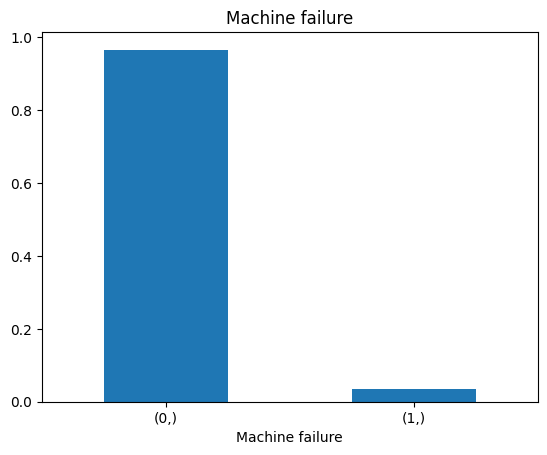

Machine failure
0                  96.61
1                   3.39
Name: proportion, dtype: float64


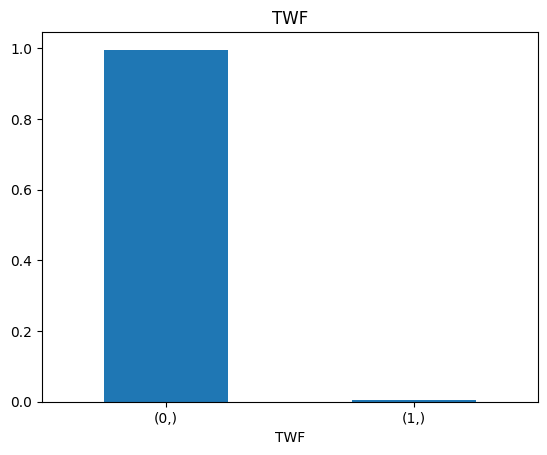

TWF
0      99.54
1       0.46
Name: proportion, dtype: float64


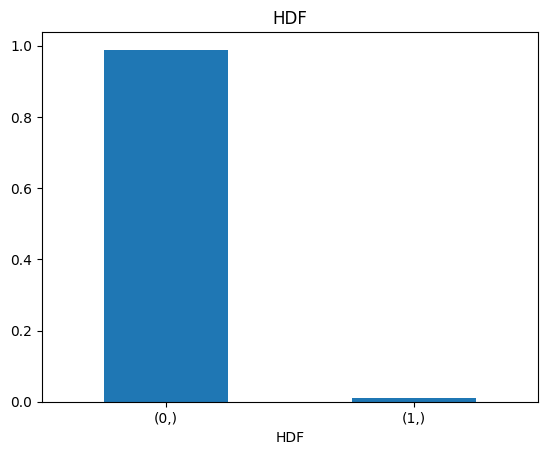

HDF
0      98.85
1       1.15
Name: proportion, dtype: float64


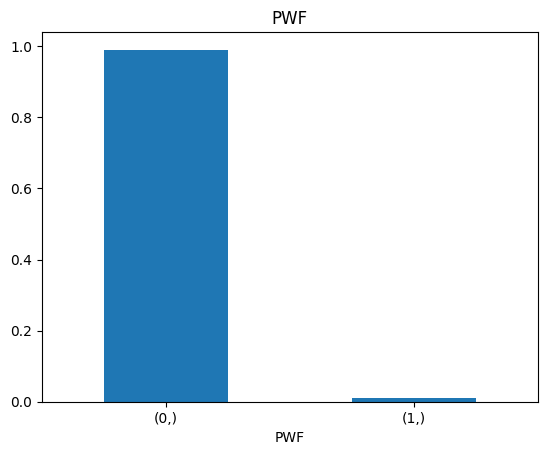

PWF
0      99.05
1       0.95
Name: proportion, dtype: float64


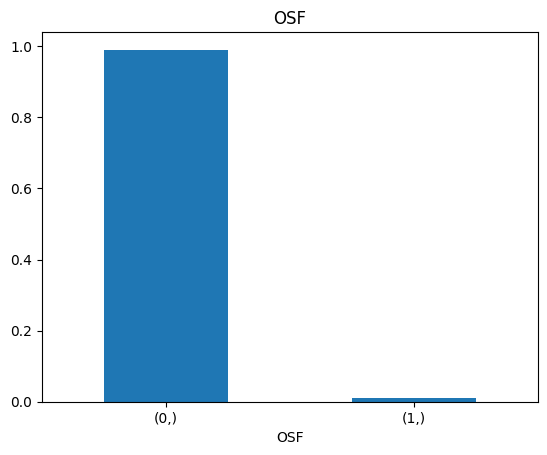

OSF
0      99.02
1       0.98
Name: proportion, dtype: float64


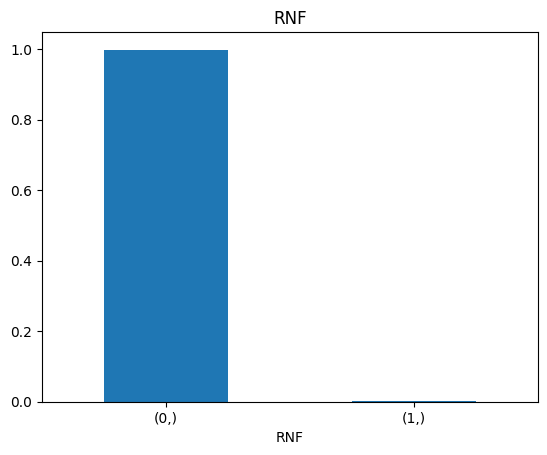

RNF
0      99.81
1       0.19
Name: proportion, dtype: float64


In [6]:
for col in data.columns[-6:]:
  col_vals = data[[col]].value_counts(normalize=True)
  col_vals.plot(kind="bar", rot=0);
  plt.title(col)
  plt.show()
  print(col_vals*100)

TWF
0    99.54
1     0.46
Name: proportion, dtype: float64


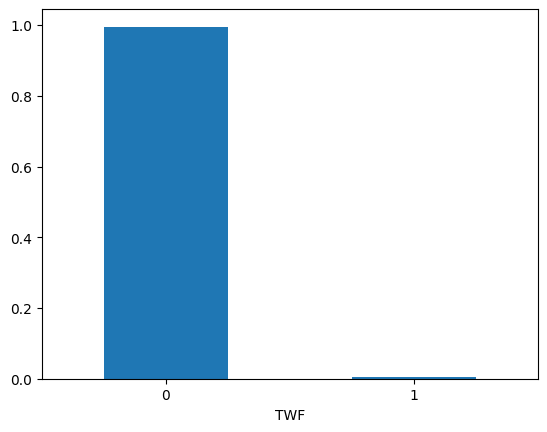

In [7]:
twf_vals = data.TWF.value_counts(normalize=True)
twf_vals.plot(kind="bar", rot=0)
print(twf_vals * 100)

In [8]:
FEATURES = list(X.columns[1:])
LABEL = ["Machine failure"]

df = data[FEATURES + LABEL].copy()
data[FEATURES + LABEL].corr()

,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Machine failure
Air temperature,1.000000,0.876107,0.022670,-0.013778,0.013853,0.082556
Process temperature,0.876107,1.000000,0.019277,-0.014061,0.013488,0.035946
Rotational speed,0.022670,0.019277,1.000000,-0.875027,0.000223,-0.044188
Torque,-0.013778,-0.014061,-0.875027,1.000000,-0.003093,0.191321
Tool wear,0.013853,0.013488,0.000223,-0.003093,1.000000,0.105448
Machine failure,0.082556,0.035946,-0.044188,0.191321,0.105448,1.000000


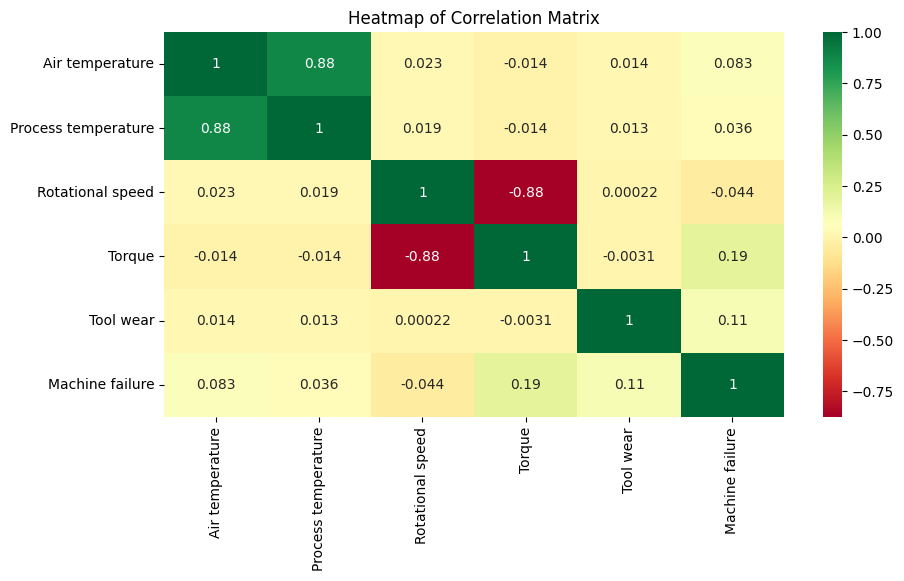

In [9]:
df_numerik = df.select_dtypes(include=['float64', 'int64'])
c = df_numerik.corr()

plt.figure(figsize=(10,5))
sns.heatmap(c, cmap="RdYlGn", annot=True)
plt.title('Heatmap of Correlation Matrix')
plt.show()

In [10]:
df.describe()

,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Machine failure
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


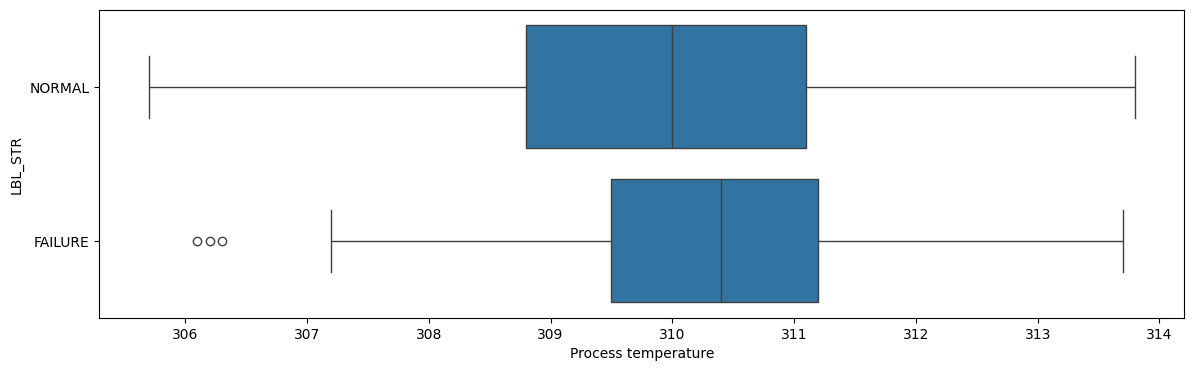

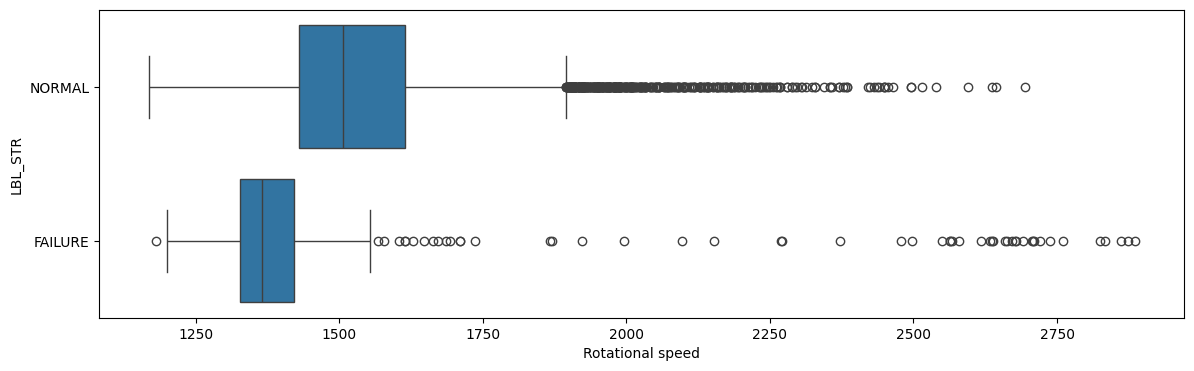

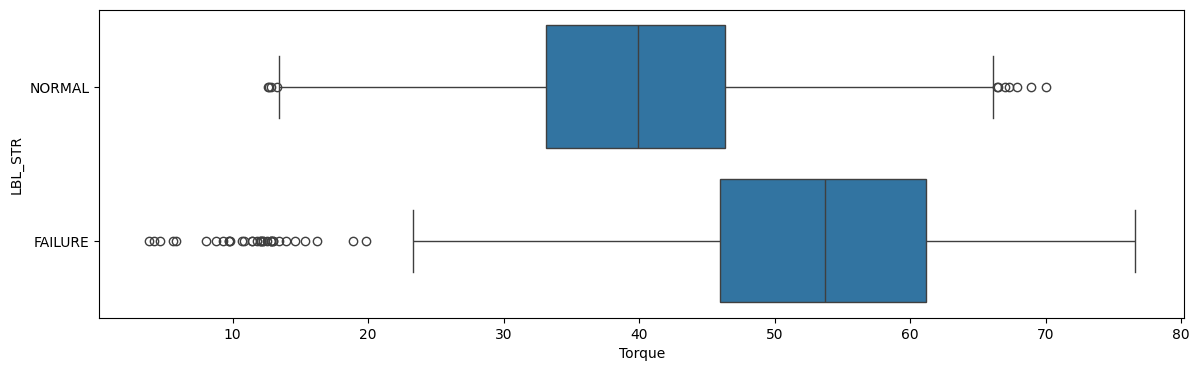

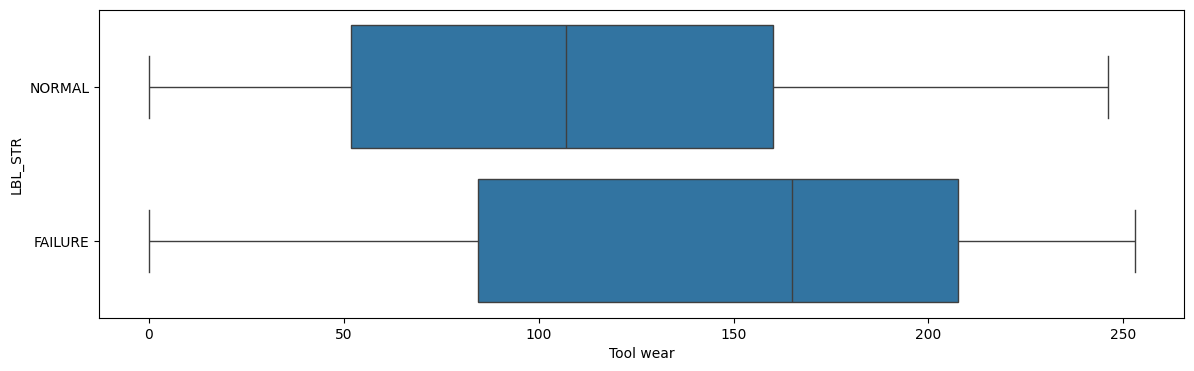

In [11]:
df["LBL_STR"] = df["Machine failure"].apply(lambda x: "FAILURE" if x==1 else "NORMAL")
# df['TWF'] = data['TWF']
# sns.boxplot(data=df, orient="h")
# plt.show()

for col in df.columns[1:-2]:
  plt.figure(figsize=(14,4))

  # sns.histplot(data=df, x=col, hue="TWF")
  # sns.boxplot(data=df.columns[0])#hue="TWF");
  # sns.boxplot(data=df, x=col, y="LBL_STR")#df.columns[0])#hue="TWF");
  sns.boxplot(data=df, x=col, y="LBL_STR")
  # plt.title(col)
  plt.show()

In [19]:
# Membagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [20]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [21]:
# Menggunakan K-Nearest Neighbors sebagai model prediksi
model = KNeighborsClassifier()
model.fit(X_train, y_train)

# Melakukan prediksi pada data test
y_pred = model.predict(X_test)


print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1989
           1       0.00      0.00      0.00        11

    accuracy                           0.99      2000
   macro avg       0.50      0.50      0.50      2000
weighted avg       0.99      0.99      0.99      2000



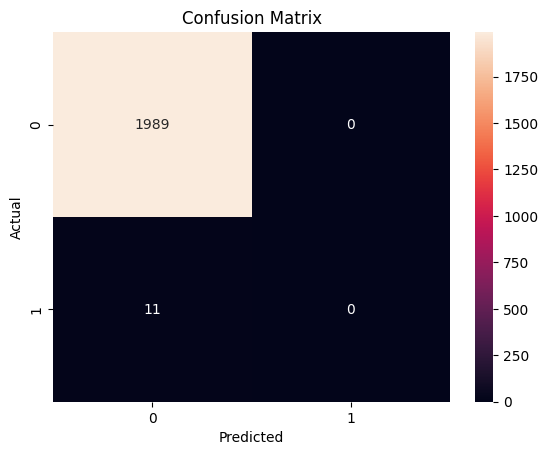

In [22]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [23]:
# Menampilkan akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')


Accuracy: 0.9945
